# 分群演算法(非監督式學習)
## --------------------------------------------------------------------------------------------------------------------------------

## 觀念釐清:
## 1.監督式學習:訓練資料有標籤（答案）
## 2.非監督式學習:訓練資料沒有標籤（答案）

## ---------------------------------------------------------------------------------------------------------------------------------

## 分群演算法小觀念:

#### (1)分群演算法的績效衡量簡單明暸：組間差異大，組內差異小
#### (2)而所謂的差異指的就是觀測值之間的距離遠近作為衡量，最常見還是使用歐氏距離（Euclidean distance）。
#### (3)既然我們又是以距離作為度量，在資料的預處理程序中，與 k-Nearest Neighbors 分類器一樣我們必須將所有的數值型變數標準化（Normalization），避免因為單位不同，在距離的計算上失真。
## ---------------------------------------------------------------------------------------------------------------------------------

## 學習地圖:
### 使用熟悉的鳶尾花資料，建立非監督式學習的 K-Means 與 Hierarchical Clustering 的分群模型

# 一、K-Means
## K-Means 演算法可以非常快速地完成分群任務，但是如果觀測值具有雜訊（Noise）或者極端值，其分群結果容易被這些雜訊與極端值影響，適合處理分布集中的大型樣本資料。

## 1.實作k-means分群

In [1]:
from sklearn import cluster, datasets

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(iris_X)

# 印出分群結果
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)

分群結果：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
---
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 2.績效
分群演算法的績效可以使用 Silhouette 係數或 WSS（Within Cluster Sum of Squares）/BSS（Between Cluster Sum of Squares）。

### sklearn.metrics方法，這個數值愈接近 1 表示績效愈好，反之愈接近 -1 表示績效愈差。

In [4]:
from sklearn import cluster, datasets, metrics

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(iris_X)
cluster_labels = kmeans_fit.labels_

# 印出績效
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.552591944521


## 3.如何選擇 k
隨著 k 值的增加，K-Means 演算法的績效一定會愈來愈好，當 k = 觀測值數目的時候，我們會得到一個組間差異最大，組內差異最小的結果，但這不是我們想要的，實務上我們讓程式幫忙選擇一個適合的 k

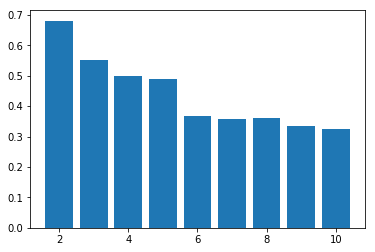

[0.68081362027135062, 0.55259194452136751, 0.49782569007544908, 0.48851755085386278, 0.36820569653764568, 0.35621836206847463, 0.36142018629277439, 0.33368419765752699, 0.32386298051649687]


In [5]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(iris_X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

# 二、Hierarchical Clustering
## 與 K-Means 演算法不同的地方在於不需要事先設定 k 值，Hierarchical Clustering 演算法每一次只將兩個觀測值歸為一類，然後在演算過程中得到 k = 1 一直到 k = n（觀測值個數）群的結果。

## 1.實作

In [6]:
from sklearn import cluster, datasets

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# Hierarchical Clustering 演算法
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 3)

# 印出分群結果
hclust.fit(iris_X)
cluster_labels = hclust.labels_
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print(iris_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 2.績效

In [7]:
from sklearn import cluster, datasets, metrics

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# Hierarchical Clustering 演算法
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 3)

# 印出績效
hclust.fit(iris_X)
cluster_labels = hclust.labels_
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.554097290787


# 三、總結

## 比較:
1.K-Means一開始會知道多少個cluster,而Hierarchical Clustering不行
2.Hierarchical Clustering缺點:
雖然Hierarchical Clustering最後建立很好的tree,但是有一些缺點,如果沒有額外的工作,此algorithm無法把資料切到不同的cluster,另外就是這algorithm運算的花費太高,當item間合併時,必須再重新計算距離,所以Hierarchical Clustering在非常大的datasets中會執行非常的慢